## Stock Data
Now that you've had exposure to time series data, let's look at bringing stock prices into Pandas.
## Reading in Data
Your dataset can come in a variety of different formats. The most common format is the [CSV](https://en.wikipedia.org/wiki/Comma-separated_values). We'll use the "prices.csv" file as an example csv file.

In [ ]:
with open('prices.csv', 'r') as file:
    prices = file.read()
    
print(prices)

In [5]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
all_data = {ticker: web.get_data_yahoo(ticker) for ticker in ["AAPL",'IBM','MSFT','GOOG','TSLA','KO']}
all_data

{'AAPL':                   High         Low        Open       Close       Volume  \
 Date                                                                      
 2016-04-26   26.325001   25.977501   25.977501   26.087500  224064800.0   
 2016-04-27   24.677500   23.920000   24.000000   24.455000  458408400.0   
 2016-04-28   24.469999   23.562500   24.402500   23.707500  328970800.0   
 2016-04-29   23.680000   23.127501   23.497499   23.434999  274126000.0   
 2016-05-02   23.520000   23.100000   23.492500   23.410000  192640400.0   
 ...                ...         ...         ...         ...          ...   
 2021-04-19  135.470001  133.339996  133.509995  134.839996   94264200.0   
 2021-04-20  135.529999  131.809998  135.020004  133.110001   94812300.0   
 2021-04-21  133.750000  131.300003  132.360001  133.500000   68847100.0   
 2021-04-22  134.149994  131.410004  133.039993  131.940002   84566500.0   
 2021-04-23  135.119995  132.160004  132.160004  134.320007   78657500.0   
 
  

In [65]:
price_1 = all_data["AAPL"]
price_1.resample("M").last()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-30,23.680000,23.127501,23.497499,23.434999,274126000.0,21.797100
2016-05-31,25.100000,24.705000,24.900000,24.965000,169228800.0,23.361542
2016-06-30,23.942499,23.575001,23.610001,23.900000,143345600.0,22.364946
2016-07-31,26.137501,25.920000,26.047501,26.052500,110934800.0,24.379189
2016-08-31,26.642500,26.410000,26.415001,26.525000,118649600.0,24.955809
...,...,...,...,...,...,...
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.492020
2021-01-31,136.740005,130.210007,135.830002,131.960007,177180600.0,131.763107
2021-02-28,124.849998,121.199997,122.589996,121.260002,164320000.0,121.260002


In [178]:
price = pd.DataFrame({ticker:data["Adj Close"] for ticker,data in all_data.items()})
price

,AAPL,IBM,MSFT,GOOG,TSLA,KO
Date,,,,,,
2016-04-26,24.264212,119.548088,47.169029,708.140015,50.748001,37.779278
2016-04-27,22.745811,120.662750,46.710537,705.840027,50.293999,37.906540
2016-04-28,22.050558,117.936295,45.756889,691.020020,49.542000,37.864113
2016-04-29,21.797100,117.030098,45.729378,693.010010,48.152000,38.008331
2016-05-02,21.773848,116.492844,46.407951,698.210022,48.360001,38.161049
...,...,...,...,...,...,...
2021-04-19,134.839996,133.119995,258.739990,2302.399902,714.630005,54.000000
2021-04-20,133.110001,138.160004,258.260010,2293.629883,718.989990,54.169998
2021-04-21,133.500000,143.550003,260.579987,2293.290039,744.119995,54.610001


## DataFrame Calculations
Now that we have the data in a DataFrame, we can start to do calculations on it. Let's find out the median value for each stock using the [`DataFrame.median`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.median.html) function.

In [8]:
price.median()

AAPL      45.556606
IBM      126.280067
MSFT     103.988892
GOOG    1116.349976
dtype: float64

In [15]:
price_1.median()

High         4.722750e+01
Low          4.648250e+01
Open         4.690000e+01
Close        4.690750e+01
Volume       1.130776e+08
Adj Close    4.555661e+01
dtype: float64

# Resample Data
## Pandas Resample
You've learned about bucketing to different periods of time like Months. Let's see how it's done. We'll start with an example series of days.

In [20]:
dates = pd.date_range('10/10/2018',periods=11,freq='D')
closes_price=np.arange(len(dates))

close = pd.Series(closes_price,dates)

In [21]:
close

2018-10-10     0
2018-10-11     1
2018-10-12     2
2018-10-13     3
2018-10-14     4
2018-10-15     5
2018-10-16     6
2018-10-17     7
2018-10-18     8
2018-10-19     9
2018-10-20    10
Freq: D, dtype: int64

Let's say we want to bucket these days into 3 day periods. To do that, we'll use the [DataFrame.resample](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.resample.html) function. The first parameter in this function is a string called `rule`, which is a representation of how to resample the data. This string representation is made using an offset alias. You can find a list of them [here](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases). To create 3 day periods, we'll set `rule` to "3D".

In [22]:
close.resample('3D')

This returns a `DatetimeIndexResampler` object. It's an intermediate object similar to the `GroupBy` object. Just like group by, it breaks the original data into groups. That means, we'll have to apply an operation to these groups. Let's make it simple and get the first element from each group.

In [24]:
close.resample('3D').first()

2018-10-10    0
2018-10-13    3
2018-10-16    6
2018-10-19    9
Freq: 3D, dtype: int64

In [23]:
close.resample('3D').mean()

2018-10-10    1.0
2018-10-13    4.0
2018-10-16    7.0
2018-10-19    9.5
Freq: 3D, dtype: float64

You might notice that this is the same as .iloc[::3]

In [25]:
close.iloc[::3]

2018-10-10    0
2018-10-13    3
2018-10-16    6
2018-10-19    9
Freq: 3D, dtype: int64

So, why use the `resample` function instead of `.iloc[::3]` or the `groupby` function?

The `resample` function shines when handling time and/or date specific tasks. In fact, you can't use this function if the index isn't a [time-related class](https://pandas.pydata.org/pandas-docs/version/0.21/timeseries.html#overview).

In [28]:
try:
    # Attempt resample on a series without a time index
    pd.Series(closes_price).resample('W')
except TypeError:
    print('It threw a TypeError.')
else:
    print('It worked.')

It threw a TypeError.


One of the resampling tasks it can help with is resampling on periods, like weeks. Let's resample `close` from it's days frequency to weeks. We'll use the "W" offset allies, which stands for Weeks.

In [29]:
close.resample("W")

In [30]:
close.resample("W").first()

2018-10-14    0
2018-10-21    5
Freq: W-SUN, dtype: int64

In [31]:
close

2018-10-10     0
2018-10-11     1
2018-10-12     2
2018-10-13     3
2018-10-14     4
2018-10-15     5
2018-10-16     6
2018-10-17     7
2018-10-18     8
2018-10-19     9
2018-10-20    10
Freq: D, dtype: int64

In [32]:
pd.DataFrame({
    "days":close,
    "weeks":close.resample("W").first()
    
}
)

,days,weeks
2018-10-10,0.0,NaN
2018-10-11,1.0,NaN
2018-10-12,2.0,NaN
2018-10-13,3.0,NaN
2018-10-14,4.0,0.0
2018-10-15,5.0,NaN
2018-10-16,6.0,NaN
2018-10-17,7.0,NaN
2018-10-18,8.0,NaN
2018-10-19,9.0,NaN


The weeks offset considers the start of a week on a Monday. Since 2018-10-10 is a Wednesday, the first group only looks at the first 5 items. There are offsets that handle more complicated problems like filtering for Holidays. For now, we'll only worry about resampling for days, weeks, months, quarters, and years. The frequency you want the data to be in, will depend on how often you'll be trading. If you're making trade decisions based on reports that come out at the end of the year, we might only care about a frequency of years or months.


## OHLC
Now that you've seen how Pandas resamples time series data, we can apply this to Open, High, Low, and Close (OHLC). Pandas provides the [`Resampler.ohlc`](https://pandas.pydata.org/pandas-docs/version/0.21.0/generated/pandas.core.resample.Resampler.ohlc.html#pandas.core.resample.Resampler.ohlc) function will convert any resampling frequency to OHLC data. Let's get the Weekly OHLC.

In [33]:
price_1.resample("W")

In [34]:
price_1.resample("W").first()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-01,26.412500,26.127501,26.250000,26.270000,112126400.0,24.433960
2016-05-08,23.520000,23.100000,23.492500,23.410000,192640400.0,21.773848
2016-05-15,23.442499,23.147499,23.250000,23.197500,131745600.0,21.707569
2016-05-22,23.597500,22.912500,23.097500,23.469999,245039200.0,21.962561
2016-05-29,24.297501,23.917500,23.967501,24.107500,152074400.0,22.559116
...,...,...,...,...,...,...
2021-03-28,123.870003,120.260002,120.330002,123.389999,111912300.0,123.389999
2021-04-04,122.580002,120.730003,121.650002,121.389999,80819200.0,121.389999
2021-04-11,126.160004,123.070000,123.870003,125.900002,88651200.0,125.900002


# Calculate Returns

Using the formula $ \frac{p_{t} - p_{t-1}}{p_{t-1}} $, let's apply it to some example prices. For this exercise, we'll calculate the returns for each day using the closing price data in `close`.

In [35]:
close = pd.DataFrame({
   'ABC': [1, 5, 3, 6, 2],
    'EFG': [12, 51, 43, 56, 22],
    'XYZ': [35, 36, 36, 36, 37],},
    pd.date_range("01/05/2021",periods=5,freq='D')
)
close

,ABC,EFG,XYZ
2021-01-05,1,12,35
2021-01-06,5,51,36
2021-01-07,3,43,36
2021-01-08,6,56,36
2021-01-09,2,22,37


In [36]:
close.pct_change()

,ABC,EFG,XYZ
2021-01-05,NaN,NaN,NaN
2021-01-06,4.000000,3.250000,0.028571
2021-01-07,-0.400000,-0.156863,0.000000
2021-01-08,1.000000,0.302326,0.000000
2021-01-09,-0.666667,-0.607143,0.027778


In [39]:
###or using another way which i do not like
###shift the dataframe frist
close.shift(1)

,ABC,EFG,XYZ
2021-01-05,NaN,NaN,NaN
2021-01-06,1.0,12.0,35.0
2021-01-07,5.0,51.0,36.0
2021-01-08,3.0,43.0,36.0
2021-01-09,6.0,56.0,36.0


In [40]:
close

,ABC,EFG,XYZ
2021-01-05,1,12,35
2021-01-06,5,51,36
2021-01-07,3,43,36
2021-01-08,6,56,36
2021-01-09,2,22,37


In [41]:
(close-close.shift(1))/close.shift(1)

,ABC,EFG,XYZ
2021-01-05,NaN,NaN,NaN
2021-01-06,4.000000,3.250000,0.028571
2021-01-07,-0.400000,-0.156863,0.000000
2021-01-08,1.000000,0.302326,0.000000
2021-01-09,-0.666667,-0.607143,0.027778


### Dtype
Data Type Object
Let's look into how you might generate positions from signals. To do that, we first need to know about dtype or data type objects in Numpy.

A data type object is a class that represents the data. It's similar to a `[data type](data type)`, but contains more information about the data. Let's see an example of a data type object in Numpy using the array array.

In [50]:
array = np.arange(10)
array2=array/2

In [49]:
print(array)
print(type(array))
print(array.dtype)

[0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>
int64


In [51]:
print(array2)
print(type(array2))
print(array2.dtype)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
<class 'numpy.ndarray'>
float64


How would we convert this back to int64? We'll use the `ndarray.astype` function to cast it from it's current type to the type of int64 (np.int64).

In [52]:
int_arr = array2.astype(int)
int_arr

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4])

This casts the data to int64, but all also changes the data. Since fractions can't be represented as integers, the decimal place is dropped.

## Signals to Positions
Now that you've seen how the a [data type object](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.dtypes.html) is used in Numpy, let's see how to use it to generate positions from signals. Let's use `prices` array to represent the prices in dollars over time for a single stock.

In [53]:
prices = np.array([1, 3, -2, 9, 5, 7, 2])

prices

array([ 1,  3, -2,  9,  5,  7,  2])

For the positions, let's say we want to buy one share of stock when the price is above 2 dollars and the buy 3 more shares when it's above 4 dollars. We'll first need to generate the signal for these two positions.

In [54]:
signal_1 = prices > 2
signal_2 = prices > 4

print(signal_1)
print(signal_2)

[False  True False  True  True  True False]
[False False False  True  True  True False]


This gives us the points in time for the signals above 2 dollars and above 4 dollars. To turn this into positions, we need to multiply each array by the respective amount to invest. We first need to turn each signal into an integer using the [`ndarray.astype`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html) function.

In [55]:
signal_1.astype(int)

array([0, 1, 0, 1, 1, 1, 0])

In [56]:
signal_2.astype(int)

array([0, 0, 0, 1, 1, 1, 0])

Now we multiply each array by the respective amount to invest. 

In [58]:
position1 = signal_1.astype(int)*1
position2 = signal_2.astype(int) *3

total_position = position1+position2
total_position

array([0, 1, 0, 4, 4, 4, 0])

# Top and Bottom Performing
Let's look at how we might get the top performing stocks for a single period. For this example, we'll look at just a single month of closing prices:

In [60]:
month = pd.to_datetime('02/01/2018')
close_month = pd.DataFrame(
    {
        'A': 1,
        'B': 12,
        'C': 35,
        'D': 3,
        'E': 79,
        'F': 2,
        'G': 15,
        'H': 59},
    [month])

close_month

,A,B,C,D,E,F,G,H
2018-02-01,1,12,35,3,79,2,15,59


`close_month` gives use the prices for the month of February, 2018 for all the stocks in this universe (A, B, C, ...). Looking at these prices, we can see that the top 2 performing stocks for that month was E and H with the prices 79 and 59.

To get this using code, we can use the [`Series.nlargest`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.Series.nlargest.html) function. This function returns the items with the *n* largest numbers. For the example we just talked about, our *n* is 2.

In [61]:
try:
    # Attempt to run nlargest
    close_month.nlargest(2)
except TypeError as err:
    print('Error: {}'.format(err))

Error: nlargest() missing 1 required positional argument: 'columns'


What happeened here? It turns out we're not calling the [`Series.nlargest`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.Series.nlargest.html) function, we're actually calling [`DataFrame.nlargest`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.nlargest.html), since `close_month` is a DataFrame. Let's get the Series from the dataframe using `.loc[month]`, where `month` is the 2018-02-01 index created above.

In [62]:
close_month.loc[month].nlargest(2)

E    79
H    59
Name: 2018-02-01 00:00:00, dtype: int64

Perfect! That gives us the top performing tickers for that month. Now, how do we get the bottom performing tickers? There's two ways to do this. You can use Panda's [`Series.nsmallest`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.Series.nsmallest.html) function or just flip the sign on the prices and then apply [`DataFrame.nlargest`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.nlargest.html). Either way is fine. For this course, we'll flip the sign with nlargest. This allows us to reuse any funtion created with nlargest to get the smallest.

To get the bottom 2 performing tickers from `close_month`, we'll flip the sign.

In [64]:
(-1 * close_month).loc[month].nlargest(2)

A   -1
F   -2
Name: 2018-02-01 00:00:00, dtype: int64

# Project 1: Sectional Momentum Trading

In [205]:
sp500= pd.read_csv("sp-500-index-04-26-2021.csv")

In [216]:
ticker_name = list(sp500["Symbol"])[:-1]
ticker_name

['A',
 'AAL',
 'AAP',
 'AAPL',
 'ABBV',
 'ABC',
 'ABMD',
 'ABT',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALK',
 'ALL',
 'ALLE',
 'ALXN',
 'AMAT',
 'AMCR',
 'AMD',
 'AME',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ATO',
 'ATVI',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BAX',
 'BBY',
 'BDX',
 'BEN',
 'BF.B',
 'BIIB',
 'BIO',
 'BK',
 'BKNG',
 'BKR',
 'BLK',
 'BLL',
 'BMY',
 'BR',
 'BRK.B',
 'BSX',
 'BWA',
 'BXP',
 'C',
 'CAG',
 'CAH',
 'CARR',
 'CAT',
 'CB',
 'CBOE',
 'CBRE',
 'CCI',
 'CCL',
 'CDNS',
 'CDW',
 'CE',
 'CERN',
 'CF',
 'CFG',
 'CHD',
 'CHRW',
 'CHTR',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COG',
 'COO',
 'COP',
 'COST',
 'CPB',
 'CPRT',
 'CRM',
 'CSCO',
 'CSX',
 'CTAS',
 'CTLT',
 'CTSH',
 'CTVA',
 'CTXS',
 'CVS',
 '

In [217]:
type(ticker_name)

list

In [219]:
import yfinance as yf
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

start = dt.datetime.today()-dt.timedelta(365)
end = dt.datetime.today()

cl_price = pd.DataFrame()
ohcv_data = {}

for ticker in ticker_name:
    cl_price[ticker] = yf.download(ticker, start, end)['Adj Close']

#cl_price.fillna(method='bfill',inplace = False,axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [220]:
cl_price

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-27,75.713707,10.020000,118.001060,69.867989,80.610329,89.213005,163.470001,93.546883,176.923691,348.500000,...,63.730915,87.848824,40.585293,40.761536,69.863968,86.498283,116.672829,220.929993,29.690145,126.697266
2020-04-28,74.919334,11.260000,120.004951,68.735474,78.773308,87.984589,164.399994,90.108459,175.868637,333.450012,...,64.412315,84.960426,41.536659,41.287174,72.519524,86.576744,113.941956,228.479996,30.210855,122.302345
2020-04-29,78.166344,12.630000,123.913513,70.993095,79.725128,87.797852,169.279999,90.916336,184.940155,349.170013,...,63.351273,90.707550,43.836552,43.836006,72.845314,85.782295,120.019394,244.970001,30.991920,124.837891
2020-04-30,76.120834,12.010000,119.945442,72.490776,78.240273,88.112335,191.250000,90.729149,182.603256,353.640015,...,61.871651,86.454094,42.922138,42.090496,70.979500,84.772041,118.867462,229.660004,30.480854,128.576553
2020-05-01,73.688049,10.640000,115.659889,71.323730,78.849434,84.888947,183.490005,88.522247,177.574478,343.839996,...,60.528309,82.091820,39.846371,39.958206,68.402916,82.202309,115.441452,225.550003,29.796213,126.806648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-19,133.500000,21.549999,192.539993,134.839996,108.610001,119.500000,329.420013,124.529999,286.540009,516.169983,...,70.489998,126.900002,56.480000,65.529999,108.209999,117.709999,172.529999,509.630005,56.000000,167.850006
2021-04-20,132.460007,20.370001,193.910004,133.110001,109.029999,120.500000,330.100006,120.000000,288.600006,514.210022,...,71.550003,123.620003,55.290001,65.480003,107.589996,117.959999,173.809998,499.559998,52.349998,168.740005
2021-04-21,133.830002,21.010000,199.869995,133.500000,110.800003,121.160004,342.640015,122.599998,290.720001,512.340027,...,71.320000,126.949997,56.000000,66.150002,109.480003,117.449997,176.649994,491.369995,53.650002,170.149994


In [224]:
price= cl_price.resample("W").last()
price

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-03,73.688049,10.640000,115.659889,71.323730,78.849434,84.888947,183.490005,88.522247,177.574478,343.839996,...,60.528309,82.091820,39.846371,39.958206,68.402916,82.202309,115.441452,225.550003,29.796213,126.806648
2020-05-10,79.149376,10.140000,123.853989,76.727112,79.915497,86.569435,187.070007,92.315353,185.926163,367.510010,...,58.707981,85.919930,42.654278,40.315243,62.193443,84.526840,121.012436,242.919998,29.963594,124.758339
2020-05-17,81.016144,9.040000,125.054337,76.128387,86.340340,84.693153,184.919998,88.561661,181.311554,365.299988,...,56.352261,82.692703,39.545589,37.399452,57.445019,83.271393,111.608299,217.800003,26.354698,126.766876
2020-05-24,84.382309,9.700000,132.415146,78.894363,87.663376,91.992065,206.160004,90.118309,191.004257,385.260010,...,58.766384,86.031006,41.993649,41.892147,61.423431,85.576317,122.541733,243.539993,29.446644,129.372025
2020-05-31,87.520081,10.500000,138.208572,78.659325,88.205917,94.164948,223.899994,93.517326,198.803757,386.600006,...,63.302601,91.356407,42.812809,46.136902,65.752678,88.469521,125.461273,261.320007,32.099670,138.599365
2020-06-07,89.744324,18.590000,144.934479,82.014114,89.329079,97.750214,249.809998,88.532112,205.577774,392.899994,...,63.526493,95.578972,49.978092,49.766758,72.105934,95.164139,136.444351,277.549988,37.659325,140.210175
2020-06-14,85.504364,16.740000,134.887421,83.820145,88.006035,93.700745,241.679993,87.704514,198.774170,406.540009,...,62.371365,90.114479,44.413460,43.022762,63.591991,89.997742,124.319283,258.329987,34.021164,133.309570
2020-06-21,88.105934,16.000000,144.243103,86.521790,92.051300,100.891014,257.089996,89.339981,198.734726,428.010010,...,62.724133,94.863625,43.293003,43.260780,64.711983,87.020172,125.342125,264.410004,35.191620,136.620667
2020-06-28,85.295830,12.380000,139.355362,87.489136,91.499245,97.957611,239.270004,87.399094,209.502197,426.920013,...,61.058281,90.432411,41.070915,42.864910,62.600838,83.598915,114.866257,246.419998,31.494938,131.907562


In [225]:
returns = np.log(price)-np.log(price.shift(1))
returns 

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-10,0.071496,-0.048132,0.068449,0.073026,0.013430,0.019603,0.019323,0.041957,0.045960,0.066574,...,-0.030535,0.045577,0.068096,0.008896,-0.095166,0.027886,0.047130,0.074190,0.005602,-0.016285
2020-05-17,0.023312,-0.114829,0.009645,-0.007834,0.077327,-0.021912,-0.011560,-0.041511,-0.025133,-0.006032,...,-0.040953,-0.038284,-0.075673,-0.075074,-0.079421,-0.014964,-0.080898,-0.109155,-0.128337,0.015971
2020-05-24,0.040709,0.070467,0.057194,0.035689,0.015207,0.082668,0.108729,0.017424,0.052079,0.053200,...,0.041948,0.039576,0.060064,0.113442,0.066963,0.027304,0.093456,0.111704,0.110933,0.020342
2020-05-31,0.036510,0.079249,0.042822,-0.002984,0.006170,0.023346,0.082547,0.037023,0.040022,0.003472,...,0.074356,0.060061,0.019319,0.096515,0.068109,0.033250,0.023545,0.070465,0.086266,0.068895
2020-06-07,0.025097,0.571249,0.047518,0.041765,0.012653,0.037367,0.109501,-0.054781,0.033506,0.016165,...,0.003531,0.045184,0.154747,0.075734,0.092236,0.072945,0.083920,0.060255,0.159735,0.011555
2020-06-14,-0.048397,-0.104823,-0.071841,0.021782,-0.014922,-0.042309,-0.033086,-0.009392,-0.033655,0.034127,...,-0.018351,-0.058872,-0.118042,-0.145618,-0.125649,-0.055819,-0.093064,-0.071763,-0.101598,-0.050469
2020-06-21,0.029972,-0.045212,0.067060,0.031723,0.044941,0.073935,0.061812,0.018476,-0.000198,0.051464,...,0.005640,0.051359,-0.025552,0.005517,0.017459,-0.033645,0.008194,0.023263,0.033825,0.024534
2020-06-28,-0.032414,-0.256506,-0.034473,0.011118,-0.006015,-0.029506,-0.071834,-0.021964,0.052763,-0.002550,...,-0.026917,-0.047838,-0.052691,-0.009193,-0.033168,-0.040109,-0.087279,-0.070464,-0.110981,-0.035107


In [226]:
returns_previous = returns.shift(1)
returns_previous

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-17,0.071496,-0.048132,0.068449,0.073026,0.013430,0.019603,0.019323,0.041957,0.045960,0.066574,...,-0.030535,0.045577,0.068096,0.008896,-0.095166,0.027886,0.047130,0.074190,0.005602,-0.016285
2020-05-24,0.023312,-0.114829,0.009645,-0.007834,0.077327,-0.021912,-0.011560,-0.041511,-0.025133,-0.006032,...,-0.040953,-0.038284,-0.075673,-0.075074,-0.079421,-0.014964,-0.080898,-0.109155,-0.128337,0.015971
2020-05-31,0.040709,0.070467,0.057194,0.035689,0.015207,0.082668,0.108729,0.017424,0.052079,0.053200,...,0.041948,0.039576,0.060064,0.113442,0.066963,0.027304,0.093456,0.111704,0.110933,0.020342
2020-06-07,0.036510,0.079249,0.042822,-0.002984,0.006170,0.023346,0.082547,0.037023,0.040022,0.003472,...,0.074356,0.060061,0.019319,0.096515,0.068109,0.033250,0.023545,0.070465,0.086266,0.068895
2020-06-14,0.025097,0.571249,0.047518,0.041765,0.012653,0.037367,0.109501,-0.054781,0.033506,0.016165,...,0.003531,0.045184,0.154747,0.075734,0.092236,0.072945,0.083920,0.060255,0.159735,0.011555
2020-06-21,-0.048397,-0.104823,-0.071841,0.021782,-0.014922,-0.042309,-0.033086,-0.009392,-0.033655,0.034127,...,-0.018351,-0.058872,-0.118042,-0.145618,-0.125649,-0.055819,-0.093064,-0.071763,-0.101598,-0.050469
2020-06-28,0.029972,-0.045212,0.067060,0.031723,0.044941,0.073935,0.061812,0.018476,-0.000198,0.051464,...,0.005640,0.051359,-0.025552,0.005517,0.017459,-0.033645,0.008194,0.023263,0.033825,0.024534


In [230]:
returns.head(10)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-10,0.071496,-0.048132,0.068449,0.073026,0.013430,0.019603,0.019323,0.041957,0.045960,0.066574,...,-0.030535,0.045577,0.068096,0.008896,-0.095166,0.027886,0.047130,0.074190,0.005602,-0.016285
2020-05-17,0.023312,-0.114829,0.009645,-0.007834,0.077327,-0.021912,-0.011560,-0.041511,-0.025133,-0.006032,...,-0.040953,-0.038284,-0.075673,-0.075074,-0.079421,-0.014964,-0.080898,-0.109155,-0.128337,0.015971
2020-05-24,0.040709,0.070467,0.057194,0.035689,0.015207,0.082668,0.108729,0.017424,0.052079,0.053200,...,0.041948,0.039576,0.060064,0.113442,0.066963,0.027304,0.093456,0.111704,0.110933,0.020342
2020-05-31,0.036510,0.079249,0.042822,-0.002984,0.006170,0.023346,0.082547,0.037023,0.040022,0.003472,...,0.074356,0.060061,0.019319,0.096515,0.068109,0.033250,0.023545,0.070465,0.086266,0.068895
2020-06-07,0.025097,0.571249,0.047518,0.041765,0.012653,0.037367,0.109501,-0.054781,0.033506,0.016165,...,0.003531,0.045184,0.154747,0.075734,0.092236,0.072945,0.083920,0.060255,0.159735,0.011555
2020-06-14,-0.048397,-0.104823,-0.071841,0.021782,-0.014922,-0.042309,-0.033086,-0.009392,-0.033655,0.034127,...,-0.018351,-0.058872,-0.118042,-0.145618,-0.125649,-0.055819,-0.093064,-0.071763,-0.101598,-0.050469
2020-06-21,0.029972,-0.045212,0.067060,0.031723,0.044941,0.073935,0.061812,0.018476,-0.000198,0.051464,...,0.005640,0.051359,-0.025552,0.005517,0.017459,-0.033645,0.008194,0.023263,0.033825,0.024534
2020-06-28,-0.032414,-0.256506,-0.034473,0.011118,-0.006015,-0.029506,-0.071834,-0.021964,0.052763,-0.002550,...,-0.026917,-0.047838,-0.052691,-0.009193,-0.033168,-0.040109,-0.087279,-0.070464,-0.110981,-0.035107


In [231]:
returns_lookahead = returns.shift(-1)
returns_lookahead.head(10)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-03,0.071496,-0.048132,0.068449,0.073026,0.013430,0.019603,0.019323,0.041957,0.045960,0.066574,...,-0.030535,0.045577,0.068096,0.008896,-0.095166,0.027886,0.047130,0.074190,0.005602,-0.016285
2020-05-10,0.023312,-0.114829,0.009645,-0.007834,0.077327,-0.021912,-0.011560,-0.041511,-0.025133,-0.006032,...,-0.040953,-0.038284,-0.075673,-0.075074,-0.079421,-0.014964,-0.080898,-0.109155,-0.128337,0.015971
2020-05-17,0.040709,0.070467,0.057194,0.035689,0.015207,0.082668,0.108729,0.017424,0.052079,0.053200,...,0.041948,0.039576,0.060064,0.113442,0.066963,0.027304,0.093456,0.111704,0.110933,0.020342
2020-05-24,0.036510,0.079249,0.042822,-0.002984,0.006170,0.023346,0.082547,0.037023,0.040022,0.003472,...,0.074356,0.060061,0.019319,0.096515,0.068109,0.033250,0.023545,0.070465,0.086266,0.068895
2020-05-31,0.025097,0.571249,0.047518,0.041765,0.012653,0.037367,0.109501,-0.054781,0.033506,0.016165,...,0.003531,0.045184,0.154747,0.075734,0.092236,0.072945,0.083920,0.060255,0.159735,0.011555
2020-06-07,-0.048397,-0.104823,-0.071841,0.021782,-0.014922,-0.042309,-0.033086,-0.009392,-0.033655,0.034127,...,-0.018351,-0.058872,-0.118042,-0.145618,-0.125649,-0.055819,-0.093064,-0.071763,-0.101598,-0.050469
2020-06-14,0.029972,-0.045212,0.067060,0.031723,0.044941,0.073935,0.061812,0.018476,-0.000198,0.051464,...,0.005640,0.051359,-0.025552,0.005517,0.017459,-0.033645,0.008194,0.023263,0.033825,0.024534
2020-06-21,-0.032414,-0.256506,-0.034473,0.011118,-0.006015,-0.029506,-0.071834,-0.021964,0.052763,-0.002550,...,-0.026917,-0.047838,-0.052691,-0.009193,-0.033168,-0.040109,-0.087279,-0.070464,-0.110981,-0.035107
2020-06-28,0.033948,0.009646,0.013129,0.029205,0.028206,0.009134,0.097750,0.038913,0.015180,0.036860,...,0.028322,0.045846,0.010490,0.024285,0.035157,0.020660,0.043898,0.034383,0.003709,0.036997


In [249]:
def get_topn(returns,topn):
    df = pd.DataFrame()
    for index, row in returns.iterrows():
        df = df.append((row >= row.nlargest(topn).min()).to_frame().T)
    df = df.astype(int)
    return df

In [273]:
long_stocks = get_topn(returns_previous,20)
long_stocks

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2020-05-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-05-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-05-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-05-24,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-05-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-06-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-06-14,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-06-21,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2020-06-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
short_stocks = get_topn(-1*returns_previous,10)
short_stocks

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2020-05-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-05-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-05-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2020-05-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-05-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-06-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-06-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-06-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-06-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-05,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
portfolio_return = (long_stocks-short_stocks)*returns_lookahead
return_daily = portfolio_return.T.sum()
return_daily

2020-05-03    0.000000
2020-05-10    0.000000
2020-05-17    0.118155
2020-05-24   -0.018626
2020-05-31    4.132852
2020-06-07   -1.122619
2020-06-14   -0.948525
2020-06-21    0.206543
2020-06-28    0.528976
2020-07-05   -0.207382
2020-07-12    0.468066
2020-07-19   -0.227864
2020-07-26   -0.126416
2020-08-02   -0.006459
2020-08-09   -0.471091
2020-08-16   -0.063713
2020-08-23    1.453642
2020-08-30   -0.290405
2020-09-06   -0.855182
2020-09-13    0.161413
2020-09-20    0.305747
2020-09-27   -0.021617
2020-10-04    0.463538
2020-10-11    0.125999
2020-10-18    0.197760
2020-10-25   -0.821666
2020-11-01    0.452701
2020-11-08    0.027825
2020-11-15    0.055760
2020-11-22    0.957862
2020-11-29    0.640453
2020-12-06    0.130797
2020-12-13   -0.477204
2020-12-20   -0.068038
2020-12-27   -0.190496
2021-01-03    1.034215
2021-01-10   -0.633022
2021-01-17   -0.123288
2021-01-24   -0.387143
2021-01-31    0.666002
2021-02-07    0.637635
2021-02-14    0.646518
2021-02-21    0.261998
2021-02-28 

<AxesSubplot:>

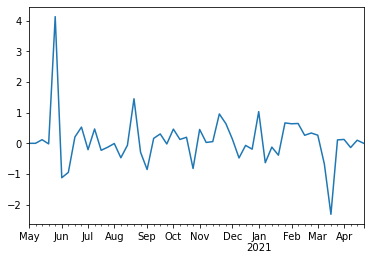

In [276]:
return_daily.plot()

## Statistical Tests
### Annualized Rate of Return

In [277]:
expected_portfolio_returns_by_date = portfolio_return.T.sum().dropna()
portfolio_ret_mean = expected_portfolio_returns_by_date.mean()
portfolio_ret_ste = expected_portfolio_returns_by_date.sem()
portfolio_ret_annual_rate = (np.exp(portfolio_ret_mean * 12) - 1) * 100

print("""
Mean:                       {:.6f}
Standard Error:             {:.6f}
Annualized Rate of Return:  {:.2f}%
""".format(portfolio_ret_mean, portfolio_ret_ste, portfolio_ret_annual_rate))


Mean:                       0.085042
Standard Error:             0.114241
Annualized Rate of Return:  177.46%



The annualized rate of return allows you to compare the rate of return from this strategy to other quoted rates of return, which are usually quoted on an annual basis. 

### T-Test
Our null hypothesis ($H_0$) is that the actual mean return from the signal is zero. We'll perform a one-sample, one-sided t-test on the observed mean return, to see if we can reject $H_0$.

We'll need to first compute the t-statistic, and then find its corresponding p-value. The p-value will indicate the probability of observing a t-statistic equally or more extreme than the one we observed if the null hypothesis were true. A small p-value means that the chance of observing the t-statistic we observed under the null hypothesis is small, and thus casts doubt on the null hypothesis. It's good practice to set a desired level of significance or alpha ($\alpha$) _before_ computing the p-value, and then reject the null hypothesis if $p < \alpha$.

For this project, we'll use $\alpha = 0.05$, since it's a common value to use.

Implement the `analyze_alpha` function to perform a t-test on the sample of portfolio returns. We've imported the `scipy.stats` module for you to perform the t-test.

Note: [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.stats.ttest_1samp.html) performs a two-sided test, so divide the p-value by 2 to get 1-sided p-value

In [290]:
p_value = stats.ttest_1samp(expected_portfolio_returns_by_date,0)[1]/2

In [291]:
p_value 

0.23002214859275233

p_value is larger than 5%, we do not proceed further